# Проект 2. Разведывательный анализ данных

Основные цели и задачи проекта: Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру. Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

Описание датасета
<br>Посмотрим на переменные, которые содержит датасет:
<br>1 school — аббревиатура школы, в которой учится ученик
<br>2 sex — пол ученика ('F' - женский, 'M' - мужской)
<br>3 age — возраст ученика (от 15 до 22)
<br>4 address — тип адреса ученика ('U' - городской, 'R' - за городом)
<br>5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)
<br>6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
<br>7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
<br>8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
<br>9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
<br>10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
<br>11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
<br>12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
<br>13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
<br>14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
<br>15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
<br>16 schoolsup — дополнительная образовательная поддержка (yes или no)
<br>17 famsup — семейная образовательная поддержка (yes или no)
<br>18 paid — дополнительные платные занятия по математике (yes или no)
<br>19 activities — дополнительные внеучебные занятия (yes или no)
<br>20 nursery — посещал детский сад (yes или no)
<br>21 higher — хочет получить высшее образование (yes или no)
<br>22 internet — наличие интернета дома (yes или no)
<br>23 romantic — в романтических отношениях (yes или no)
<br>24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
<br>25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
<br>26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
<br>27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
<br>28 absences — количество пропущенных занятий
<br>29 score — баллы по госэкзамену по математике

In [10]:
#импортируем нужные для чтения и первичного анализа библиотеки и прочитаем файл:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

data = pd.read_csv('stud_math.xls')

In [11]:
# распределение признака числовых переменных и количество пустых строк
def get_charts_col(column):
    data[column].hist()
    display(data[column].describe())
    print('Количество заполненных значений - ' + str(data[column].count()) +
          ' из 395')

In [12]:
# формул интерквартильного расстояния для фильтра выбросов
def get_emission_filter(column, a=0, b=10):
    median = data[column].median()
    IQR = data[column].quantile(0.75) - data[column].quantile(0.25)
    perc25 = data[column].quantile(0.25)
    perc75 = data[column].quantile(0.75)
    print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
          "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
    data[column].loc[data[column].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=10, range=(a, b),
                                                                                              label='IQR')
    plt.legend()

In [38]:
# ящик с усами
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=data.loc[data.loc[:, column].isin(
                    data.loc[:, column].value_counts().index[:])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [40]:
# тест Стьюдента
def get_stat_dif(column):
    cols = data.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(data.loc[data.loc[:, column] == comb[0], 'score'],
                     data.loc[data.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # поправка Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [14]:
# Посмотрим, из чего состоит датасет.
display(data.head(8))
data.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Видим столбец "studytime, granular" который отсутствует в описании датасета. Не будем гадать, что он значит и отбросим его из анализа.

In [15]:
data.drop(['studytime, granular'], inplace=True, axis=1)

Для удобства анализа приведем названия столбцов к нижнему регистру

In [16]:
data.columns = data.columns.str.lower()

Заменим пустые значения в строковых столбцах на None

In [72]:
for column in data.columns:
    if data[column].dtypes == 'object':
       data[column] = data[column].astype(str).apply(lambda x: None if x.strip() == '' 
                                                               else None if str.lower(x) == 'nan' 
                                                               else x.strip())

In [73]:
# Посмотрим, из чего состоит датасет.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     378 non-null    object 
 4   famsize     368 non-null    object 
 5   pstatus     350 non-null    object 
 6   medu        392 non-null    float64
 7   fedu        371 non-null    float64
 8   mjob        376 non-null    object 
 9   fjob        359 non-null    object 
 10  reason      378 non-null    object 
 11  guardian    364 non-null    object 
 12  traveltime  367 non-null    float64
 13  studytime   388 non-null    float64
 14  failures    373 non-null    float64
 15  schoolsup   386 non-null    object 
 16  famsup      356 non-null    object 
 17  paid        355 non-null    object 
 18  activities  381 non-null    object 
 19  nursery     379 non-null    o

Данные имеют 13 числовых признаков и 17 номинативных

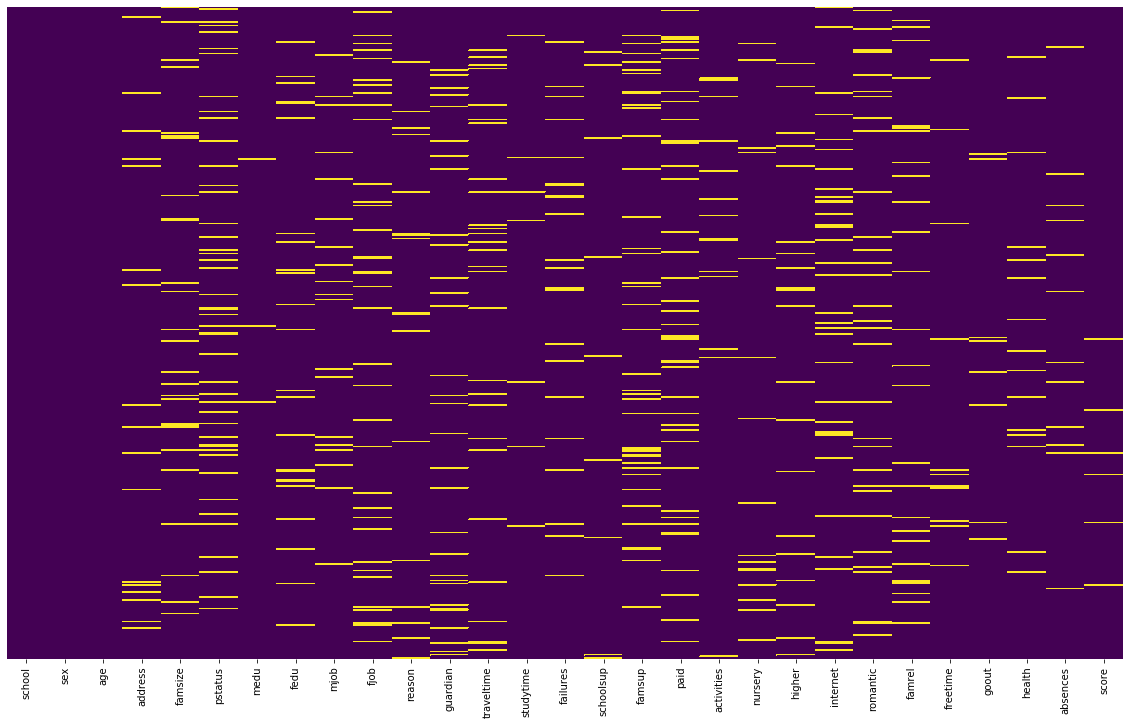

In [74]:
# Визуализируем пропуски с помощью библиотеки Seaborn
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Только "school", "sex" и "age" не имеют пропусков

Выведем уникальные значения в столбцах и значения повторяющиеся более одного раза

In [75]:
for column in data.columns:
    display(pd.DataFrame(data[column].value_counts()))
    print("Значений, встретившихся в столбце более 1 раза:",
          (data[column].value_counts() > 1).sum())
    print("Уникальных значений:", data[column].nunique())
    data.loc[:, [column]].info()

,school
GP,349
MS,46


Значений, встретившихся в столбце более 1 раза: 2
Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,sex
F,208
M,187


Значений, встретившихся в столбце более 1 раза: 2
Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


Значений, встретившихся в столбце более 1 раза: 6
Уникальных значений: 8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


,address
U,295
R,83


Значений, встретившихся в столбце более 1 раза: 2
Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,famsize
GT3,261
LE3,107


Значений, встретившихся в столбце более 1 раза: 2
Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  368 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,pstatus
T,314
A,36


Значений, встретившихся в столбце более 1 раза: 2
Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   pstatus  350 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


Значений, встретившихся в столбце более 1 раза: 5
Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   medu    392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


,fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


Значений, встретившихся в столбце более 1 раза: 5
Уникальных значений: 6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fedu    371 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


,mjob
other,133
services,98
at_home,58
teacher,55
health,32


Значений, встретившихся в столбце более 1 раза: 5
Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mjob    376 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,fjob
other,197
services,102
teacher,29
at_home,16
health,15


Значений, встретившихся в столбце более 1 раза: 5
Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fjob    359 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,reason
course,137
home,104
reputation,103
other,34


Значений, встретившихся в столбце более 1 раза: 4
Уникальных значений: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,guardian
mother,250
father,86
other,28


Значений, встретившихся в столбце более 1 раза: 3
Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


Значений, встретившихся в столбце более 1 раза: 4
Уникальных значений: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  367 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


,studytime
2.0,194
1.0,103
3.0,64
4.0,27


Значений, встретившихся в столбце более 1 раза: 4
Уникальных значений: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  388 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


,failures
0.0,293
1.0,49
2.0,16
3.0,15


Значений, встретившихся в столбце более 1 раза: 4
Уникальных значений: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  373 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


,schoolsup
no,335
yes,51


Значений, встретившихся в столбце более 1 раза: 2
Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  386 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,famsup
yes,219
no,137


Значений, встретившихся в столбце более 1 раза: 2
Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  356 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,paid
no,200
yes,155


Значений, встретившихся в столбце более 1 раза: 2
Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    355 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,activities
yes,195
no,186


Значений, встретившихся в столбце более 1 раза: 2
Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  381 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,nursery
yes,300
no,79


Значений, встретившихся в столбце более 1 раза: 2
Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  379 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,higher
yes,356
no,19


Значений, встретившихся в столбце более 1 раза: 2
Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  375 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,internet
yes,305
no,56


Значений, встретившихся в столбце более 1 раза: 2
Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  361 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,romantic
no,240
yes,124


Значений, встретившихся в столбце более 1 раза: 2
Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


Значений, встретившихся в столбце более 1 раза: 5
Уникальных значений: 6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  368 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


Значений, встретившихся в столбце более 1 раза: 5
Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  384 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


Значений, встретившихся в столбце более 1 раза: 5
Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   387 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


Значений, встретившихся в столбце более 1 раза: 5
Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  380 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


Значений, встретившихся в столбце более 1 раза: 20
Уникальных значений: 36
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  383 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
70.0,27
45.0,27
80.0,16


Значений, встретившихся в столбце более 1 раза: 16
Уникальных значений: 18
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   389 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


Видим, что "аge", "fedu", "famrel", "absences" - имеют по несколько уникальных значений. Скорее всего это выбросы, подробнее рассмотрим эти столбцы

## age — возраст ученика (от 15 до 22)

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

Количество заполненных значений - 395 из 395


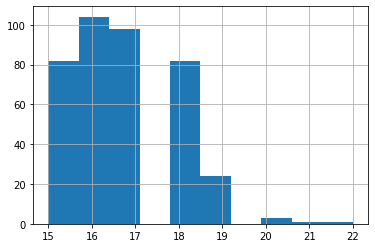

In [76]:
get_charts_col('age')

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


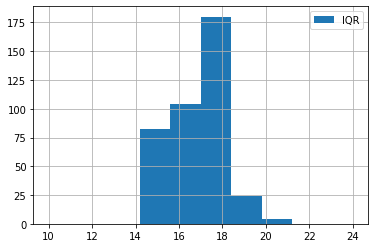

In [9]:
get_emission_filter('age',10, 24)

In [78]:
# Удалим выброс 22, это значение находится за пределами начальных условий
data.drop(data[data['age'] > 21].index, inplace=True)
data['age'].describe()

count    394.000000
mean      16.682741
std        1.249267
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       21.000000
Name: age, dtype: float64

## fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

count    370.000000
mean       2.618919
std        2.230163
min        0.000000
25%        2.000000
50%        2.500000
75%        3.000000
max       40.000000
Name: fedu, dtype: float64

Количество заполненных значений - 370 из 395


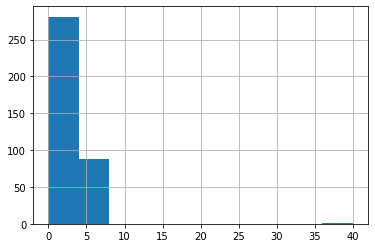

In [92]:
get_charts_col('fedu')

25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5].


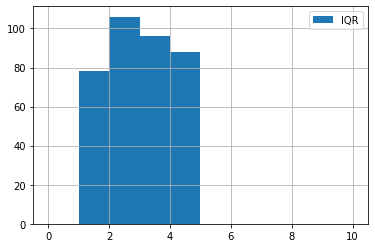

In [17]:
get_emission_filter('fedu')

Видимо 40 - это ошибка или опечатка, отбросим ноль

In [18]:
data.loc[data['fedu'] == 40.0, 'fedu'] = 4.0
data.fedu.describe()

count    371.000000
mean       2.517520
std        1.088808
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: fedu, dtype: float64

## famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо) 

count    368.000000
mean       3.937500
std        0.927277
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

Количество заполненных значений - 368 из 395


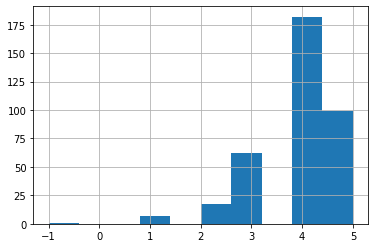

In [19]:
get_charts_col('famrel')

25-й перцентиль: 4.0, 75-й перцентиль: 5.0, IQR: 1.0,  Границы выбросов: [2.5, 6.5].


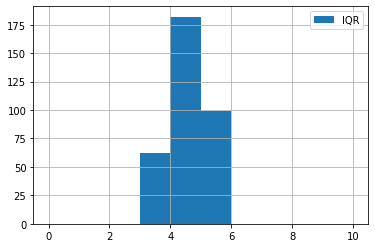

In [20]:
get_emission_filter('famrel')

видимо снова опечатка, поменяем знак у -1 

In [22]:
data.loc[data['famrel'] == -1, 'famrel'] = 1
data.famrel.describe()

count    368.000000
mean       3.942935
std        0.903824
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

## absences — количество пропущенных занятий

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

Количество заполненных значений - 383 из 395


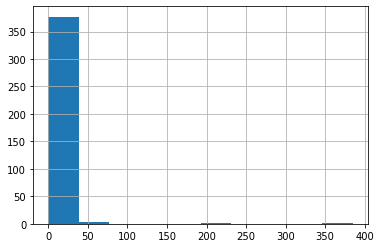

In [23]:
get_charts_col('absences')

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


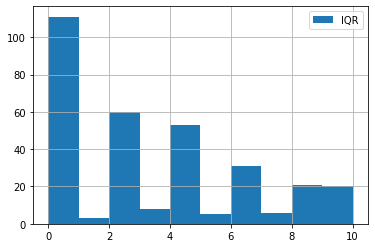

In [24]:
get_emission_filter('absences')

2 уникальные записи с большим количеством пропусков (212 и 385). Считаем их выбросами и отбрасываем из данных

In [25]:
data.drop(data[data['absences'] >= 212].index, inplace=True)
data.absences.describe()

count    381.000000
mean       5.750656
std        8.088542
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

# Корреляционный анализ

Выявим какие столбцы коррелируют с главным показателем score. Это поможет выявить показатели для дальнейшего построения модели.

In [26]:
data.corr()

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.159746,-0.161316,0.085915,-0.015453,0.215351,0.057007,0.016786,0.128993,-0.069429,0.166773,-0.153488
medu,-0.159746,1.000000,0.626567,-0.176380,0.078509,-0.244267,-0.016460,0.028320,0.062615,-0.045223,0.097295,0.216238
fedu,-0.161316,0.626567,1.000000,-0.145703,0.012900,-0.271509,-0.022049,-0.023350,0.046331,0.024808,0.040514,0.129242
traveltime,0.085915,-0.176380,-0.145703,1.000000,-0.102496,0.068639,-0.023664,-0.019325,0.035855,-0.021494,-0.014040,-0.068914
studytime,-0.015453,0.078509,0.012900,-0.102496,1.000000,-0.180014,0.039753,-0.122321,-0.051685,-0.080049,-0.067734,0.116202
failures,0.215351,-0.244267,-0.271509,0.068639,-0.180014,1.000000,-0.019835,0.088120,0.115095,0.079300,0.069703,-0.344276
famrel,0.057007,-0.016460,-0.022049,-0.023664,0.039753,-0.019835,1.000000,0.167730,0.064116,0.083675,-0.051402,0.065547
freetime,0.016786,0.028320,-0.023350,-0.019325,-0.122321,0.088120,0.167730,1.000000,0.294446,0.059978,-0.070416,0.021493
goout,0.128993,0.062615,0.046331,0.035855,-0.051685,0.115095,0.064116,0.294446,1.000000,-0.018411,0.036836,-0.122992
health,-0.069429,-0.045223,0.024808,-0.021494,-0.080049,0.079300,0.083675,0.059978,-0.018411,1.000000,-0.021752,-0.068951


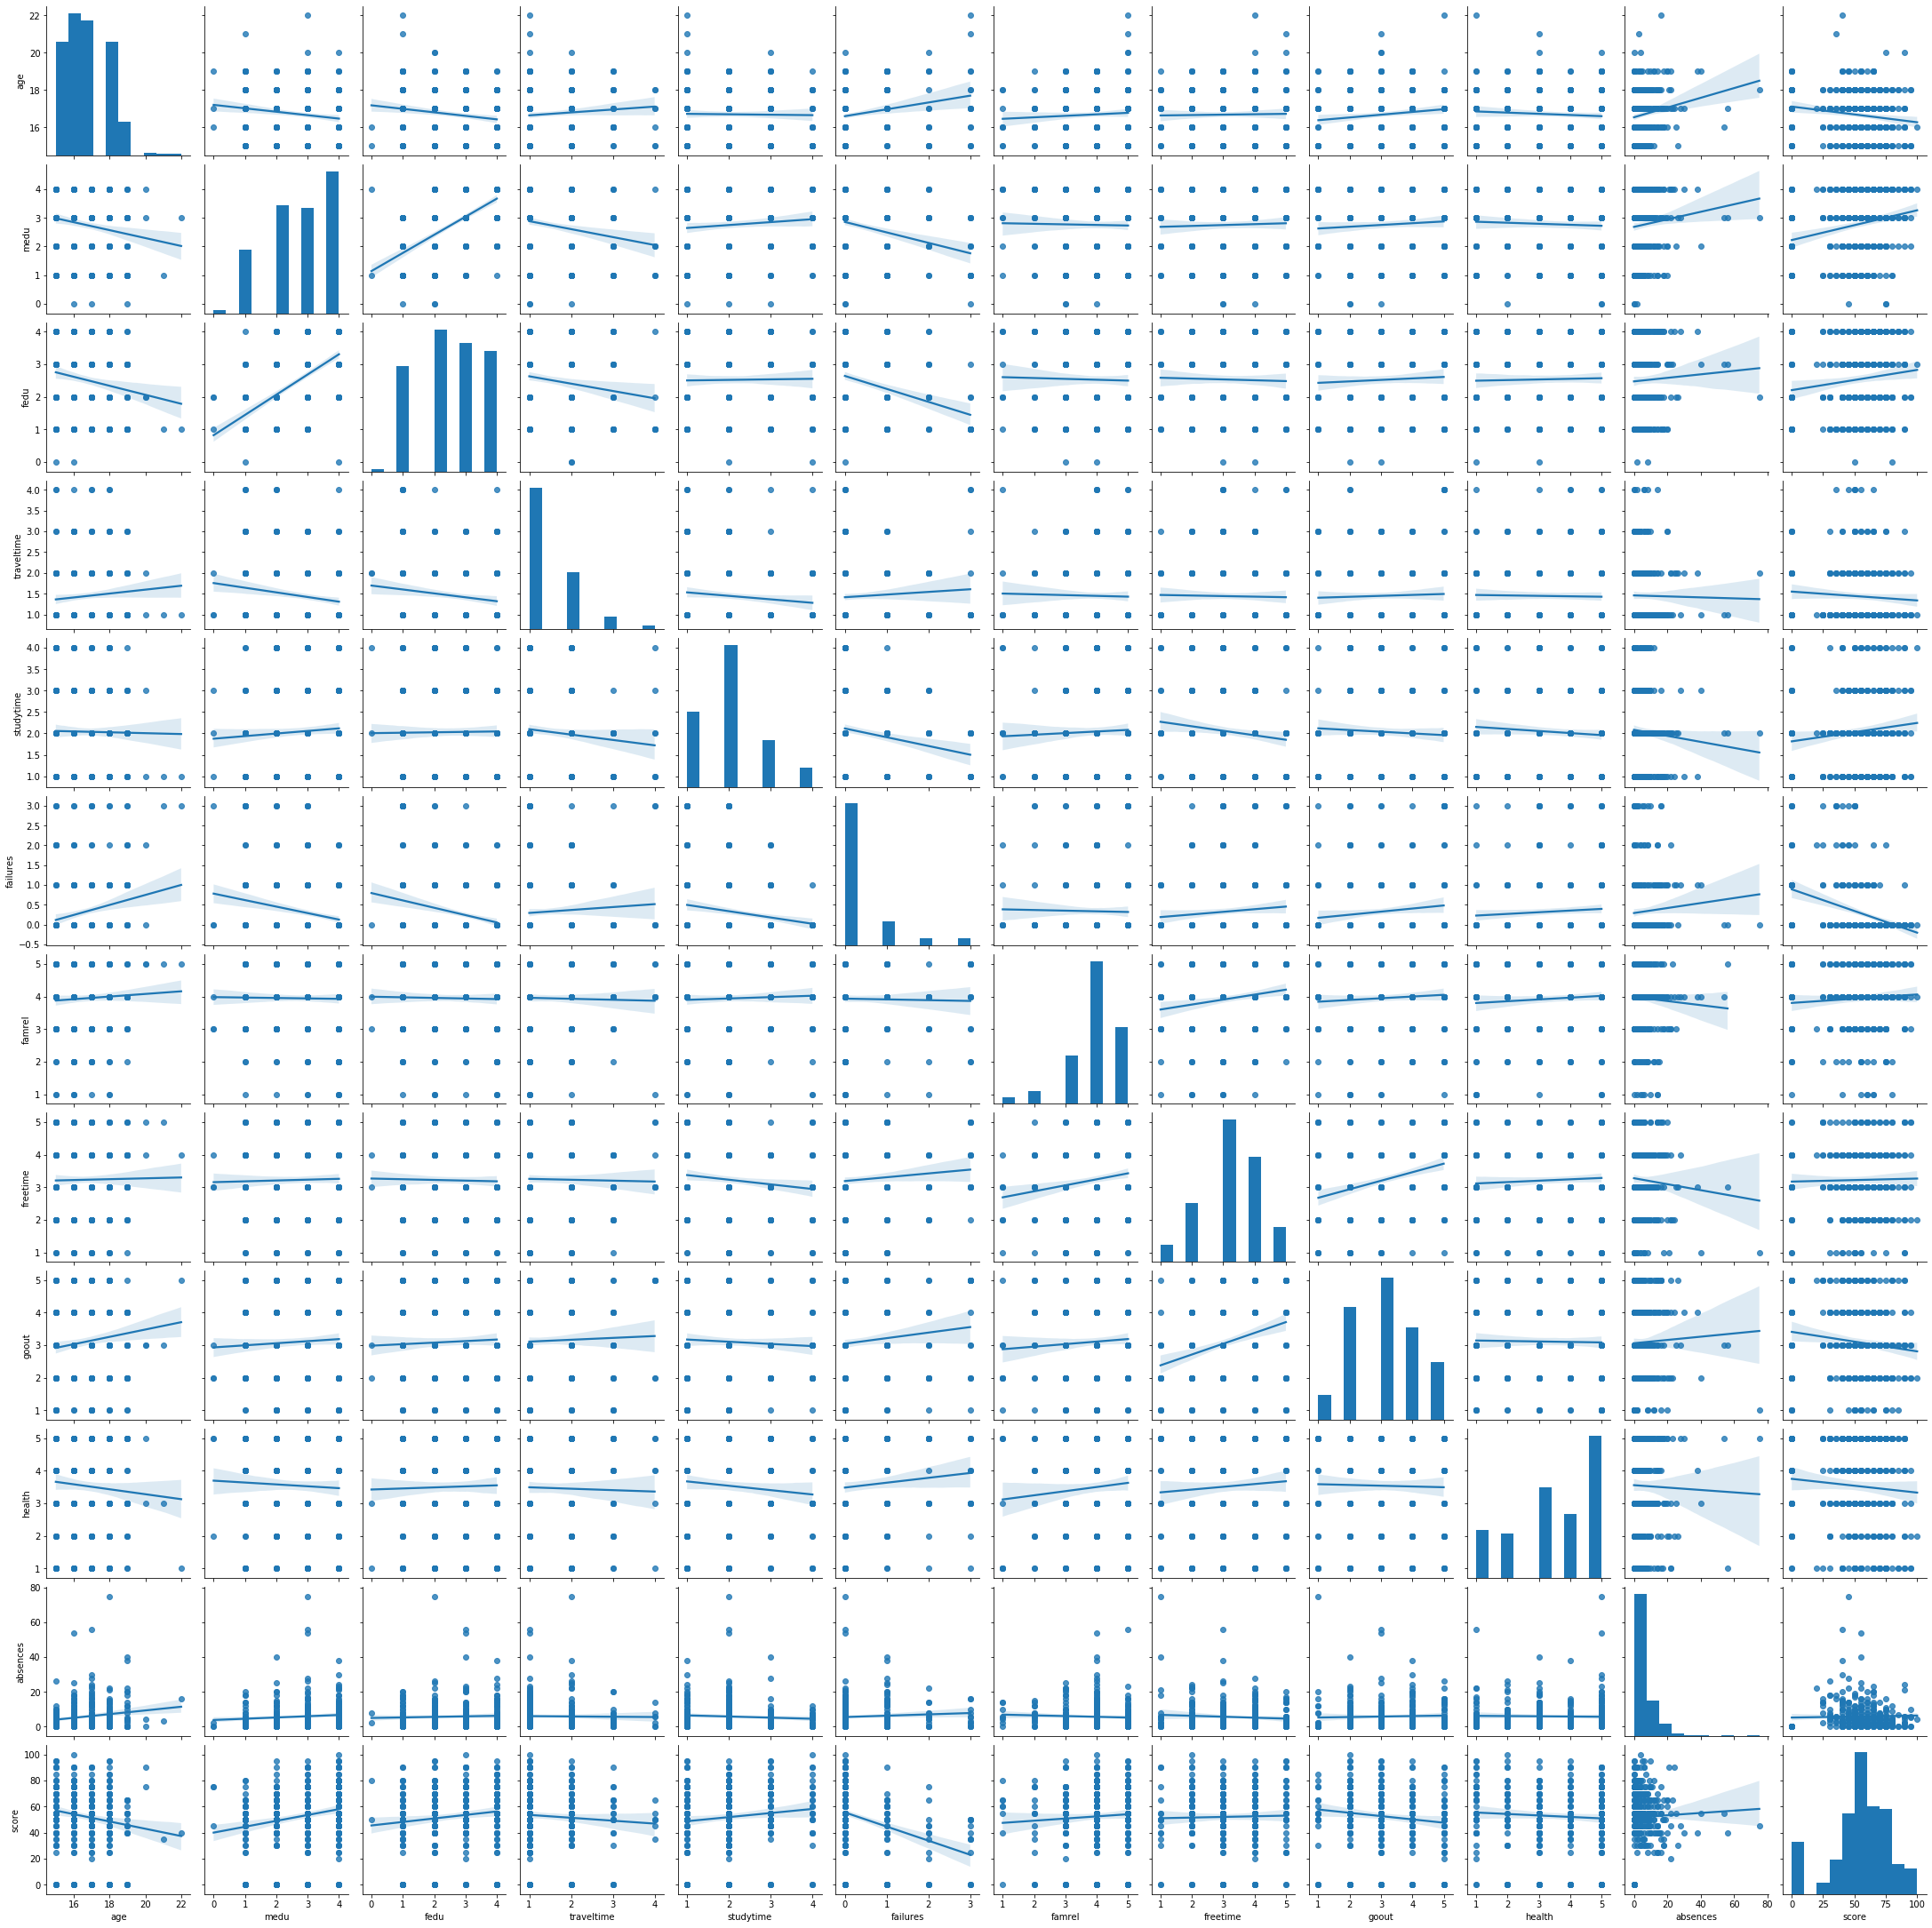

In [29]:
sns.pairplot(data, kind='reg')

Скоррелированы почти полностью переменных нет.
<br>Положительные корреляции score наблюдаются с: medu, fedu, studytime, famrel, freetime, adsences.
<br>Отрицательные корреляции score наблюдаются с: age, traveltime, failures, goout, health.

## Анализ номинативных переменных

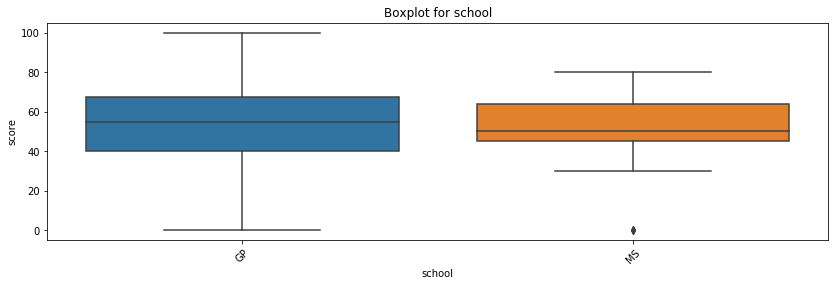

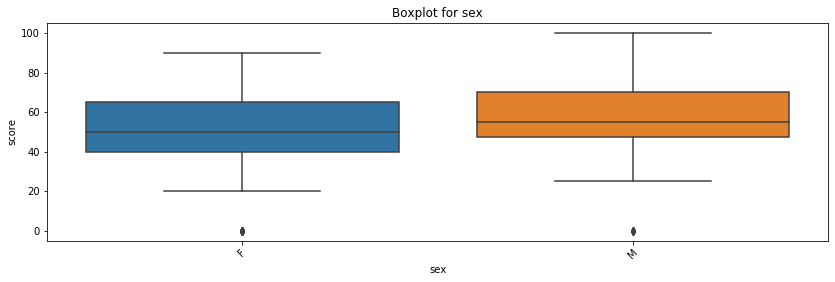

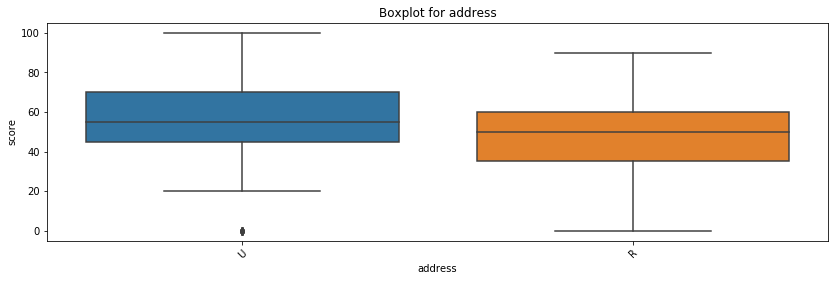

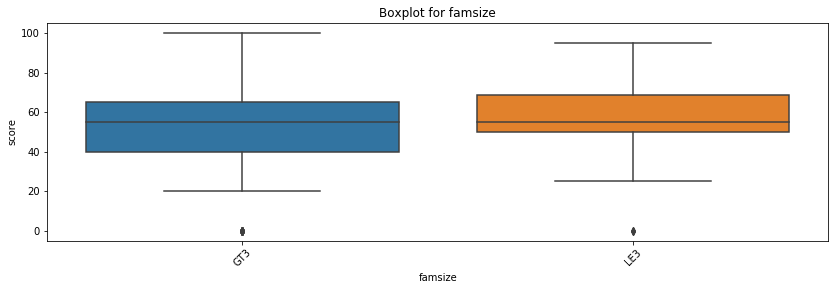

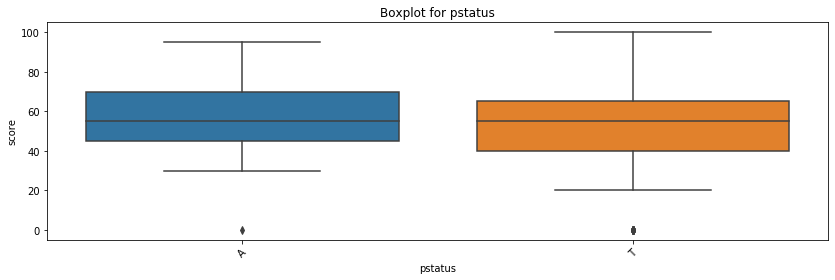

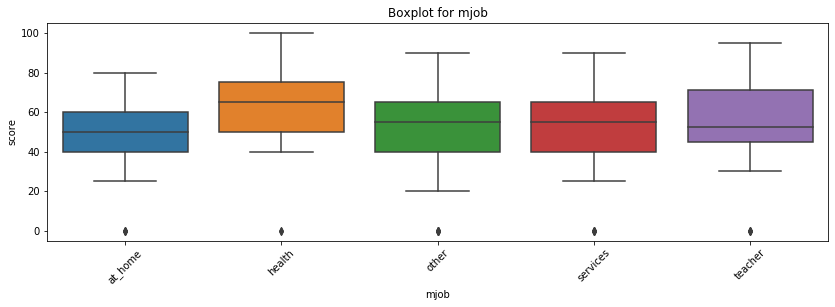

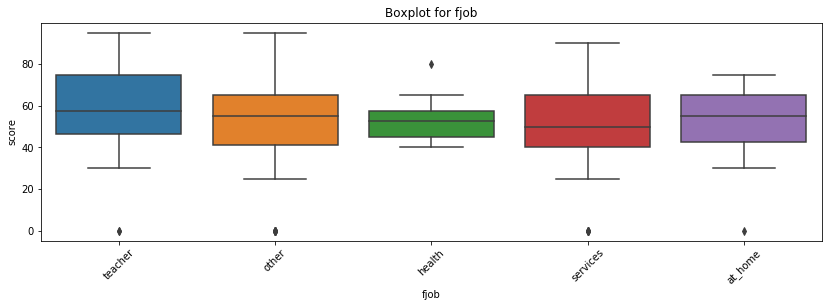

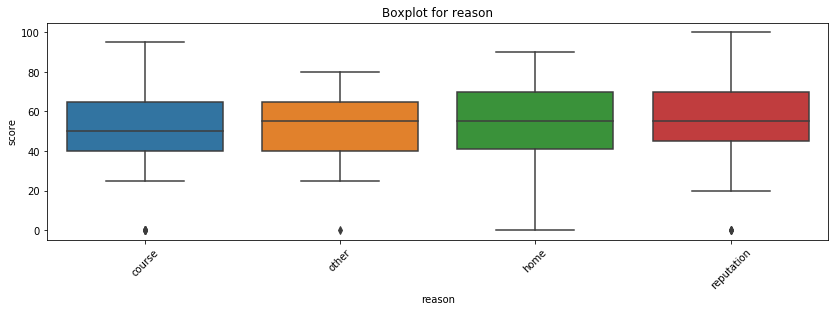

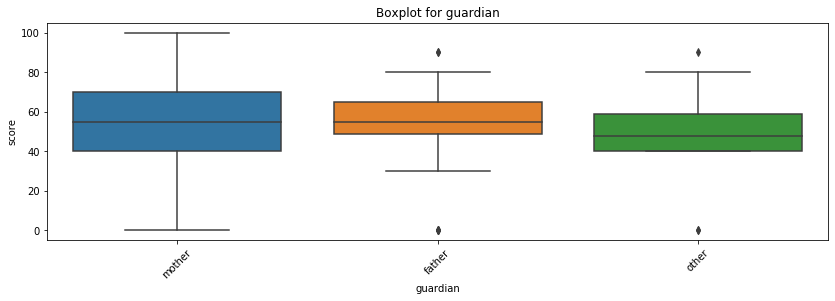

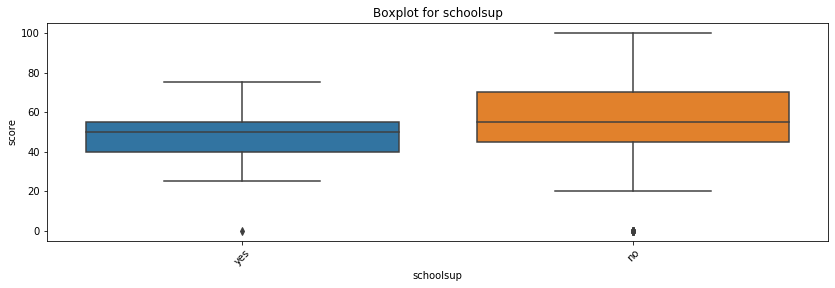

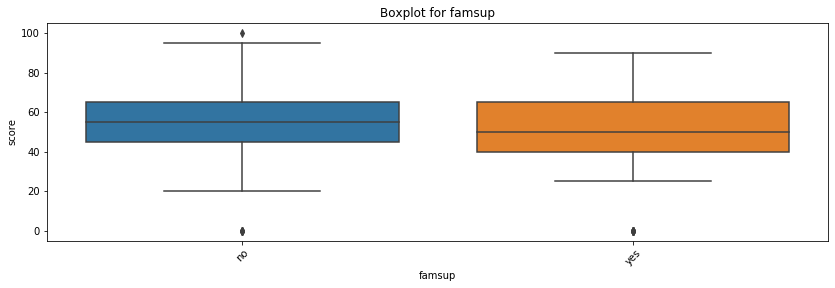

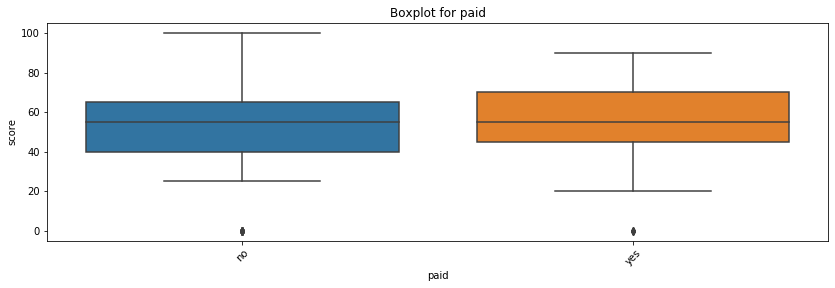

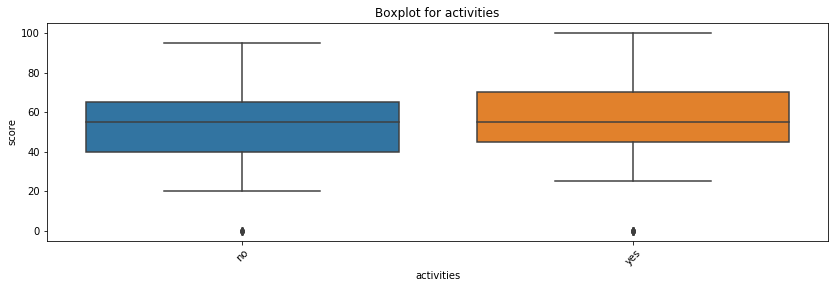

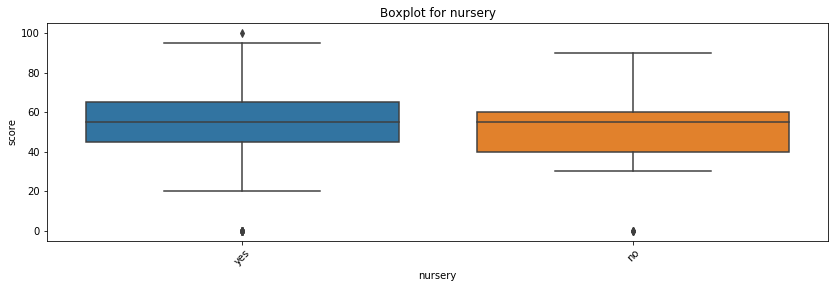

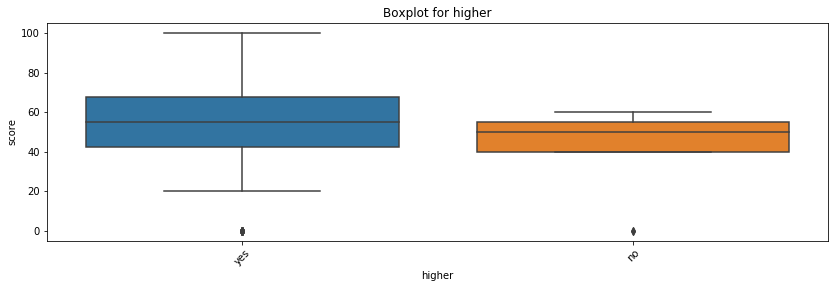

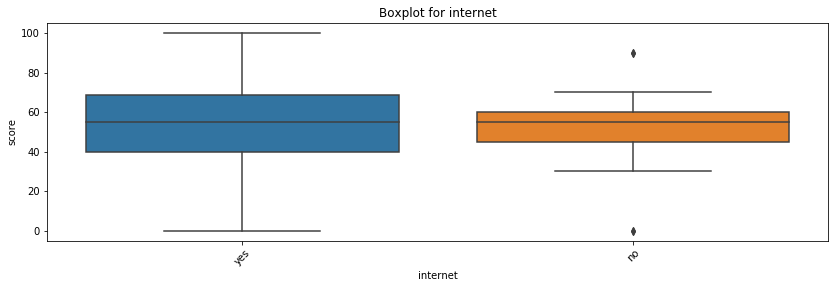

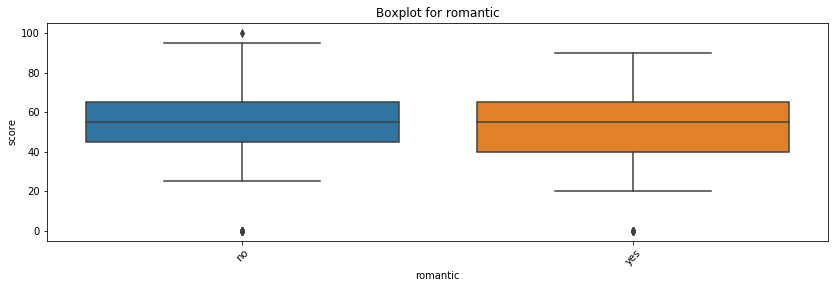

In [36]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian',
            'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

По графикам похоже, что все параметры, кроме sex, address, famsize имеют слабое влияние или не имеют влияния на успеваемость.

Проверим статистическую значимость тестом Стьюдента. Нулевая гипотеза - значимых различий нет.

In [41]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian',
            'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки famsize


# Выводы

В данных встречаются пустые значения, полностью заполнены только school, sex и age, остальные столбцы по отдельности имеют не очень много пропусков. Можно сказать, что сет довольно чистый и удобный для анализа.
<br>Выбросы найдены только в столбцах absences, score, fedu, famrel. Провели для выбросов замены или отбросили значения.
<br>Данные слабо скореллированы, но по ним можно сделать некоторые выводы:
<br>Положительно на успеваемость по математике влияют: образование их родителей (в большей мере образование матери), дополнительно выделенное время на обучение помимо школы, хорошие отношения в семье, свободное время после школы и малое количество пропущенных занятий.
<br>Отрицательно на успеваемость по математике влияют: возраст (чем старше, тем хуже успеваемость), время пути до школы, количество внеучебных неудач, количество проведенного времени с друзьями и текущее состояние здоровья.
<br>Тест Стьюдента для номинативных переменых показывает значимые различия для 'sex', 'address' и 'famsize'